In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

## Bidding Strategy

## Const Bidding Strategy

In [0]:
df_const_bid_on_train = pd.read_csv("/content/drive/My Drive/MAAI/bid_predictions/const_grid_search_on_train.csv", sep='\t')
df_const_bid_on_valid = pd.read_csv("/content/drive/My Drive/MAAI/bid_predictions/const_grid_search_on_valid.csv", sep='\t')

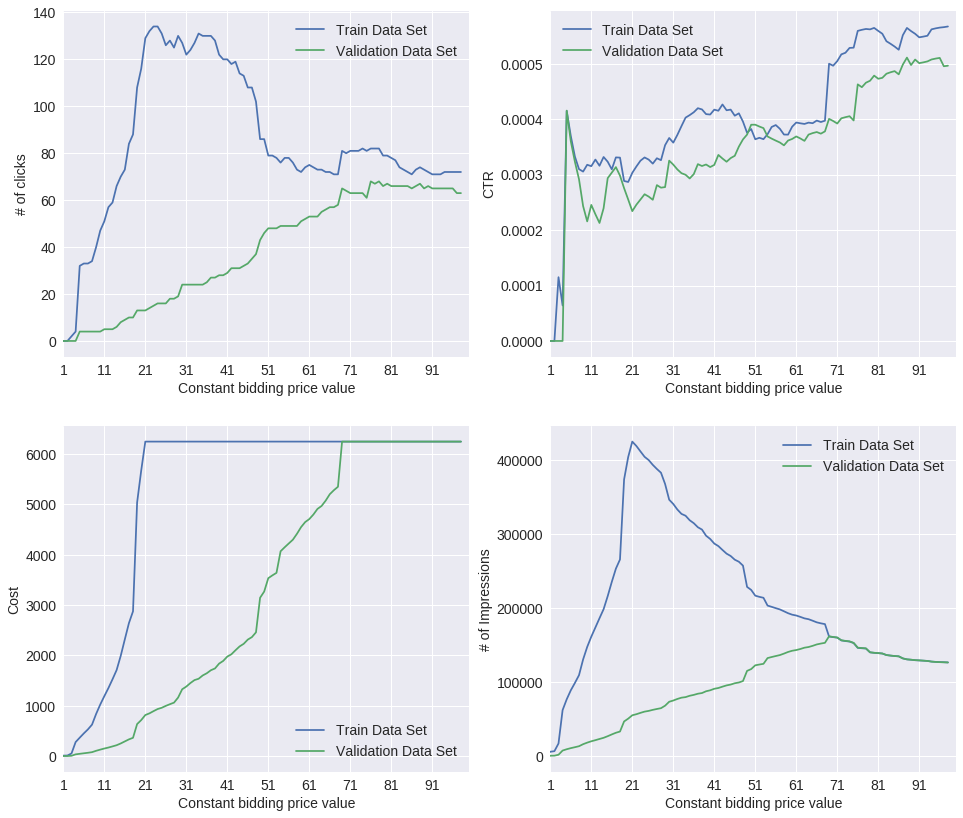

In [19]:
fig, axes = plt.subplots(figsize = (16,14), nrows=2, ncols=2)

n_clicks_train = df_const_bid_on_train['num_clicks'].plot(ax = axes[0, 0], x_compat=True, xticks=np.arange(1,100,10), label='Train Data Set')
n_clicks_valid = df_const_bid_on_valid['num_clicks'].plot(ax = axes[0, 0], x_compat=True, xticks=np.arange(1,100,10), label='Validation Data Set')
axes[0, 0].set_ylabel("# of clicks", fontsize=14)
axes[0, 0].set_xlabel("Constant bidding price value", fontsize=14)
axes[0, 0].xaxis.set_tick_params(labelsize=14)
axes[0, 0].yaxis.set_tick_params(labelsize=14)
axes[0, 0].set_xlim(1, 100)
axes[0, 0].legend(prop={'size': 14})

ctr_train = df_const_bid_on_train['ctr'].plot(ax = axes[0, 1], x_compat=True, xticks=np.arange(1,100,10), label='Train Data Set')
ctr_valid = df_const_bid_on_valid['ctr'].plot(ax = axes[0, 1], x_compat=True, xticks=np.arange(1,100,10), label='Validation Data Set')

axes[0, 1].set_ylabel("CTR", fontsize=14)
axes[0, 1].set_xlabel("Constant bidding price value", fontsize=14)
axes[0, 1].xaxis.set_tick_params(labelsize=14)
axes[0, 1].yaxis.set_tick_params(labelsize=14)
axes[0, 1].set_xlim(1, 100)
axes[0, 1].legend(prop={'size': 14})

cost_train = df_const_bid_on_train['cost'].plot(ax = axes[1, 0], x_compat=True, xticks=np.arange(1,100,10), label='Train Data Set')
cost_valid = df_const_bid_on_valid['cost'].plot(ax = axes[1, 0], x_compat=True, xticks=np.arange(1,100,10), label='Validation Data Set')

axes[1, 0].set_ylabel("Cost",fontsize=14)
axes[1, 0].set_xlabel("Constant bidding price value", fontsize=14)
axes[1, 0].xaxis.set_tick_params(labelsize=14)
axes[1, 0].yaxis.set_tick_params(labelsize=14)
axes[1, 0].set_xlim(1, 100)
axes[1, 0].legend(prop={'size': 14})

n_impressions_train = df_const_bid_on_train['num_impressions'].plot(ax = axes[1, 1], x_compat=True, xticks=np.arange(1,100,10), label='Train Data Set')
n_impressions_valid = df_const_bid_on_valid['num_impressions'].plot(ax = axes[1, 1], x_compat=True, xticks=np.arange(1,100,10), label='Validation Data Set')

axes[1, 1].set_xlabel("Constant bidding price value", fontsize=14)
axes[1, 1].set_ylabel("# of Impressions", fontsize=14)
axes[1, 1].xaxis.set_tick_params(labelsize=14)
axes[1, 1].yaxis.set_tick_params(labelsize=14)
axes[1, 1].set_xlim(1, 100)
axes[1, 1].legend(prop={'size': 14})
plt.show()

In [0]:
fig.savefig('/content/drive/My Drive/MAAI/img/const_satistics.png', bbox_inches='tight')

## Random Bidding Strategy

In [0]:
df_random_bid_on_vald = pd.read_csv("/content/drive/My Drive/MAAI/bid_predictions/random_grid_search_on_valid_new.csv", sep='\t')

In [0]:
df_random_bid_on_vald.loc[df_random_bid_on_vald['num_clicks'].idxmax()]

Unnamed: 0                       83.000000
cost                           6249.999000
ctr                               0.000605
num_clicks                       88.000000
num_impressions              145551.000000
random_price_max_boundary       134.000000
random_price_min_boundary         1.000000
Name: 83, dtype: float64

In [0]:
df_random_matrix_n_bids = df_random_bid_on_vald.pivot(index="random_price_min_boundary", columns="random_price_max_boundary", values="num_clicks")

In [0]:
df_random_matrix_n_bids = df_random_matrix_n_bids.fillna(0)

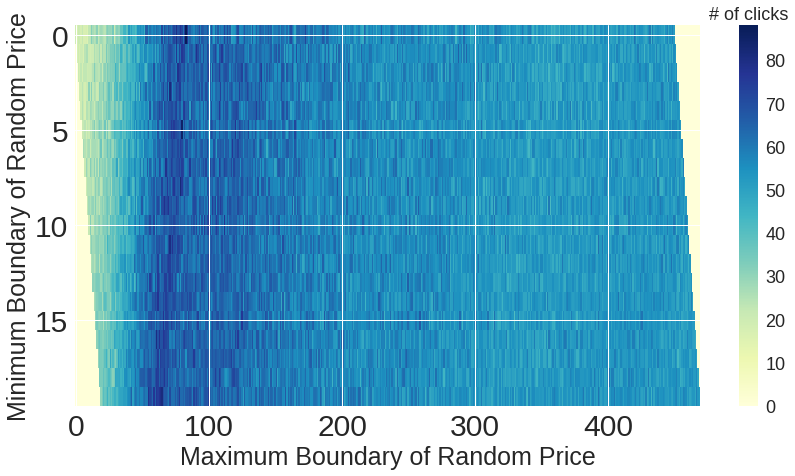

In [0]:
fig, ax = plt.subplots(figsize=(14, 7))
cm = ax.imshow(df_random_matrix_n_bids, cmap='YlGnBu', interpolation='nearest', aspect  = 'auto')
ax.set_ylabel("Minimum Boundary of Random Price", fontsize=25)
ax.set_xlabel("Maximum Boundary of Random Price", fontsize=25)
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
bar = fig.colorbar(cm, ax=ax)
bar.ax.tick_params(labelsize=18)
bar.ax.set_title("# of clicks", fontdict = {'fontsize':18, 'verticalalignment': 'baseline'})
plt.show()

In [0]:
fig.savefig('/content/drive/My Drive/MAAI/img/valid_random_n_clicks_satistics.png', bbox_inches='tight')

# Multi-agent Random Bidding Strategy

In [0]:
df_multi_random_bid_on_valid = pd.read_csv("/content/drive/My Drive/MAAI/bid_predictions/multi_random_on_valid2.csv", sep='\t')

In [0]:
df_mr_on_valid_pivoted = df_multi_random_bid_on_valid.pivot_table(values='num_clicks', index='n_agent', columns=['random_price_max_boundary', 'random_price_min_boundary'])

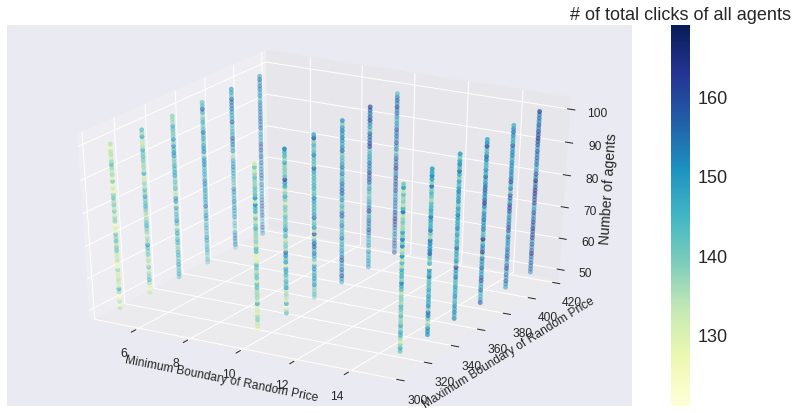

In [36]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111,projection='3d')
df_y = df_multi_random_bid_on_valid.random_price_max_boundary.values
df_x = df_multi_random_bid_on_valid.random_price_min_boundary.values
df_z = df_multi_random_bid_on_valid.n_agent.values
df_c = df_multi_random_bid_on_valid.num_clicks.values
cm = ax.scatter(xs = df_x, ys = df_y , zs = df_z, c = df_c, cmap='YlGnBu')
bar = fig.colorbar(cm, ax=ax)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.zaxis.set_tick_params(labelsize=12)
bar.ax.tick_params(labelsize=18)
ax.set_ylabel("Maximum Boundary of Random Price", fontsize=12)
ax.set_xlabel("Minimum Boundary of Random Price", fontsize=12)
ax.set_zlabel("Number of agents", fontsize=14)
bar.ax.set_title("# of total clicks of all agents", fontdict = {'fontsize':18, 'verticalalignment': 'baseline'})
plt.show()

In [0]:
fig.savefig('/content/drive/My Drive/MAAI/img/multi_valid_random_n_clicks_satistics.png', bbox_inches='tight')

# Multi-agent Random Bidding Strategy Optimised Parameters

In [0]:
df_multi_random_bid_on_valid_summary = pd.read_csv("/content/drive/My Drive/MAAI/bid_predictions/multi_random_on_valid_summary2.csv", sep='\t')

In [30]:
df_multi_random_bid_on_valid_summary

,Unnamed: 0,best_ctr,best_ctr_price_max_boundary,best_ctr_price_min_boundary,best_nclicks_price_max_boundary,best_nclicks_price_min_boundary,best_num_clicks,n_agent
0,0,0.028486,375,15,410,10,164,50
1,1,0.026637,335,15,415,15,156,51
2,2,0.026619,370,10,405,5,162,52
3,3,0.025940,385,5,415,15,159,53
4,4,0.028170,375,15,410,10,159,54
5,5,0.025453,385,5,415,15,157,55
6,6,0.027008,415,15,415,15,168,56
7,7,0.026876,375,15,415,15,160,57
8,8,0.027258,375,15,375,15,157,58
9,9,0.025964,410,10,415,15,161,59


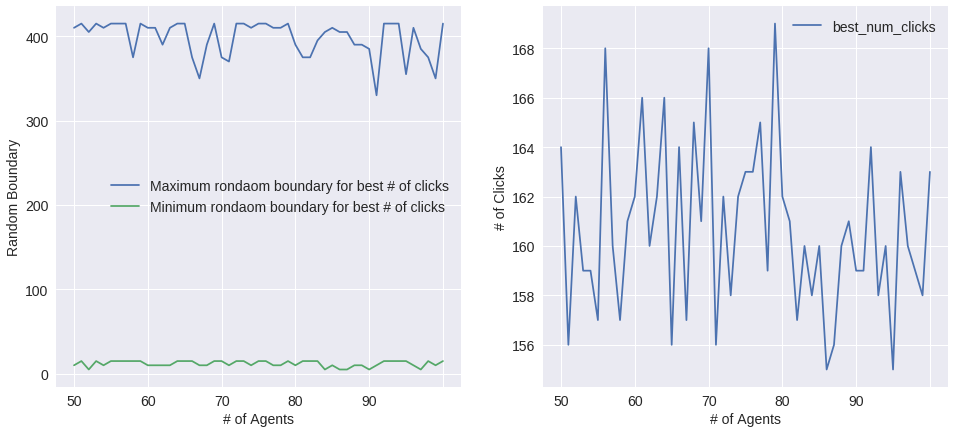

In [26]:
fig, axes = plt.subplots(figsize = (16,7), nrows=1, ncols=2)

n_clicks_max_b = df_multi_random_bid_on_valid_summary['best_nclicks_price_max_boundary'].plot(ax = axes[0], x_compat=True, label='Maximum rondaom boundary for best # of clicks')
n_clicks_min_b = df_multi_random_bid_on_valid_summary['best_nclicks_price_min_boundary'].plot(ax = axes[0], x_compat=True, label='Minimum rondaom boundary for best # of clicks')
axes[0].set_ylabel("Random Boundary", fontsize=14)
axes[0].set_xlabel("# of Agents", fontsize=14)
axes[0].set_xticklabels(np.arange(40,100,10))
axes[0].xaxis.set_tick_params(labelsize=14)
axes[0].yaxis.set_tick_params(labelsize=14)
axes[0].legend(prop={'size': 14})

ctr_train = df_multi_random_bid_on_valid_summary['best_num_clicks'].plot(ax = axes[1], x_compat=True)

axes[1].set_ylabel("# of Clicks", fontsize=14)
axes[1].set_xlabel("# of Agents", fontsize=14)
axes[1].xaxis.set_tick_params(labelsize=14)
axes[1].yaxis.set_tick_params(labelsize=14)
axes[1].set_xticklabels(np.arange(40,100,10))
axes[1].legend(prop={'size': 14})


plt.show()

In [0]:
fig.savefig('/content/drive/My Drive/MAAI/img/summary_multi_valid_random_n_clicks_satistics.png', bbox_inches='tight')